Lambda School Data Science

*Unit 4, Sprint 1, Module 4*

---

# Topic Modeling (Prepare)

# Latent Dirchilet Allocation (LDA) Models (Prepare)
<a id="#p1"></a>

## Overview
LDA is a "generative probabilistic model". 

Let's play with a modoel available [here](https://lettier.com/projects/lda-topic-modeling/)

## Follow Along

## Challenge 

# Estimating LDA Models with Gensim (Learn)
<a id="#p1"></a>

## Overview
### A Litterary Introduction: *Jane Austen V. Charlotte Bronte*
Despite being born nearly forty years apart, modern fans often pit Jane Austen & Charlotte Bronte against one another in a battle for litterary  supremacy. The battle centers around the topics of education for women, courting, and marriage. The authors' similiar backgrounds naturally draw comparisons, but the modern fascination is probably due to novelility of British women publishing novels during the early 19th century. 

Can we help close a litterary battle for supremacy and simply acknowledge that the authors addressed different topics and deserve to be acknowledged as excellent authors each in their own right?

We're going to apply Latent Dirichlet Allocation a machine learning alogrithm for topic modeling to each of the author's novels to compare the distribution of topics in their novels.

In [3]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

### Novel Data
I grabbed the novel data pre-split into a bunch of smaller chuncks

In [4]:
path = './data/austen-brontë-split'

In [5]:
import os

def gather_data(path_to_data): 
    data = []
    
    for f in os.listdir(path):
        with open(os.path.join(path,f)) as t:
            text = t.read().strip('\n')
            data.append(tokenize(str(text)))
            
    return data

In [11]:
df['tokens'] = gather_data(path)

In [14]:
"this is a sample string with a \n newline character".replace('\n', '')

'this is a sample string with a  newline character'

In [12]:
df['tokens'].head()

Austen_Emma0026         [giving, fair, companion, account, yesterday, ...
Austen_Emma0032         [feels, like, snow, place, party, try, day, di...
CBronte_Villette0086    [pierced, opaque, blackness, stood, bougie, qu...
CBronte_Jane0099        [joke, queer, looks, tell, thing, specially, s...
CBronte_Villette0092    [second, landing, floor, comprising, abode, kn...
Name: tokens, dtype: object

## Follow Along

### Text Preprocessing
**Challenge**: update the function `tokenize` with any technique you have learned so far this week. 

In [7]:
titles = [t[:-4] for t in os.listdir(path)]

In [8]:
titles[:5]

['Austen_Emma0026',
 'Austen_Emma0032',
 'CBronte_Villette0086',
 'CBronte_Jane0099',
 'CBronte_Villette0092']

In [6]:
STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [7]:
tokenize("Hello World! This a test of the tokenization method")

['hello', 'world', 'test', 'tokenization', 'method']

### Author DataFrame


In [9]:
df = pd.DataFrame(index=titles)

In [10]:
df.head()

""
Austen_Emma0026
Austen_Emma0032
CBronte_Villette0086
CBronte_Jane0099
CBronte_Villette0092


In [14]:
#

ValueError: invalid literal for int() with base 10: 'ckpo'

In [65]:
df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()
df['book'] = df.reset_index()['index'].apply(lambda x: x.split('_')[1][:-4]).tolist()
df['section'] = df.reset_index()['index'].apply(lambda x: x[-4:]).tolist()
df['section'] = df['section'].astype('int')

In [66]:
df['author'] = df['author'].map({'Austen':1, 'CBronte':0})

In [16]:
df.author.value_counts()

0.0    441
1.0    372
Name: author, dtype: int64

### Streaming Documents
Here we use a new pythonic thingy: the `yield` statement in our fucntion. This allows us to iterate over a bunch of documents without actually reading them into memory. You can see how we use this fucntion later on. 

In [17]:
def doc_stream(path):
    for f in os.listdir(path):
        with open(os.path.join(path,f)) as t:
            text = t.read().strip('\n')
            tokens = tokenize(str(text))
            yield tokens

In [27]:
streaming_data = doc_stream(path)

In [29]:
print()

### Gensim LDA Topic Modeling

In [32]:
# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(doc_stream(path))

In [34]:
id2word.token2id['england']

869

In [37]:
id2word.doc2bow(tokenize("This is a sample message Darcy England England England"))

[(869, 3), (1254, 1), (2485, 1), (16850, 1)]

In [ ]:
import sys
sys.getsizeof(id2word)

In [ ]:
len(id2word.keys())

In [38]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=10, no_above=0.75)

In [39]:
len(id2word.keys())

4921

In [40]:
# a bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
corpus = [id2word.doc2bow(text) for text in doc_stream(path)]

In [41]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=4
                  )

In [42]:
lda.print_topics()

[(0,
  '0.035*"marianne" + 0.027*"elinor" + 0.018*"willoughby" + 0.011*"sister" + 0.011*"jennings" + 0.008*"mother" + 0.006*"dashwood" + 0.006*"moment" + 0.006*"heart" + 0.005*"colonel"'),
 (1,
  '0.014*"elinor" + 0.009*"edward" + 0.008*"sister" + 0.007*"mother" + 0.006*"lucy" + 0.006*"marianne" + 0.006*"think" + 0.006*"know" + 0.006*"colonel" + 0.006*"dashwood"'),
 (2,
  '0.009*"like" + 0.008*"miss" + 0.007*"rochester" + 0.006*"room" + 0.006*"lady" + 0.005*"bessie" + 0.004*"think" + 0.004*"know" + 0.004*"come" + 0.004*"day"'),
 (3,
  '0.016*"adele" + 0.012*"rochester" + 0.008*"ladies" + 0.008*"ll" + 0.006*"shall" + 0.006*"think" + 0.006*"sir" + 0.006*"long" + 0.006*"fairfax" + 0.005*"like"'),
 (4,
  '0.014*"emma" + 0.009*"harriet" + 0.008*"miss" + 0.007*"think" + 0.007*"thing" + 0.006*"knightley" + 0.006*"weston" + 0.006*"elton" + 0.006*"know" + 0.005*"great"'),
 (5,
  '0.029*"miss" + 0.012*"jane" + 0.012*"know" + 0.010*"thing" + 0.009*"think" + 0.009*"weston" + 0.009*"oh" + 0.008*"em

In [43]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [44]:
topics = [' '.join(t[0:5]) for t in words]

In [47]:
for t in topics: 
    print(t)
    print("\n")

marianne elinor willoughby sister jennings


elinor edward sister mother lucy


like miss rochester room lady


adele rochester ladies ll shall


emma harriet miss think thing


miss jane know thing think


hunsden like st face thought


monsieur mdlle pelet reuter english


elizabeth darcy bingley bennet jane


jane sir know like rochester


graham bretton papa lucy know


like thought long night hand


madame day beck know like


dr madame thought think sir


moon adele mademoiselle liked lowood




## Challenge 

You will apply an LDA model to a customer review dataset to practice the fitting and estimation of LDA. 

# Interpret LDA Results (Learn)
<a id="#p3"></a>

## Overview

## Follow Along

### Topic Distance Visualization

In [1]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [50]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.083353 -0.002954       1        1  32.533436
4     -0.096960 -0.001643       2        1  18.099958
1     -0.142513  0.019571       3        1   9.962238
8     -0.124742  0.003269       4        1   8.912828
2      0.025856 -0.030816       5        1   6.869116
9      0.014822 -0.020306       6        1   4.988802
5     -0.109538 -0.037573       7        1   4.160623
0     -0.103589 -0.006377       8        1   3.509147
10    -0.042874  0.016049       9        1   3.245846
6      0.085583  0.048188      10        1   2.321386
7      0.090051  0.167063      11        1   2.225315
12     0.085432  0.055225      12        1   1.254993
13     0.020987  0.013558      13        1   1.243002
3      0.106342 -0.129130      14        1   0.414113
14     0.107788 -0.094124      15        1   0.259195, topic_info=     Category         Freq          Term        Total  loglift  logprob
2275  Default   700.000000        elinor   700.000000  30.0000  30.0000
2294  Default   576.000000      marianne   576.000000  29.0000  29.0000
992   Default  1530.000000          miss  1530.000000  28.0000  28.0000
1426  Default   678.000000     elizabeth   678.000000  27.0000  27.0000
77    Default   829.000000          emma   829.000000  26.0000  26.0000
377   Default  1324.000000          like  1324.000000  25.0000  25.0000
745   Default   953.000000          jane   953.000000  24.0000  24.0000
568   Default   397.000000        madame   397.000000  23.0000  23.0000
802   Default   354.000000     rochester   354.000000  22.0000  22.0000
1052  Default   606.000000           sir   606.000000  21.0000  21.0000
452   Default  1311.000000         think  1311.000000  20.0000  20.0000
1807  Default   438.000000         darcy   438.000000  19.0000  19.0000
2102  Default   291.000000      monsieur   291.000000  18.0000  18.0000
607   Default   930.000000         shall   930.000000  17.0000  17.0000
151   Default  1440.000000          know  1440.000000  16.0000  16.0000
248   Default  1140.000000       thought  1140.000000  15.0000  15.0000
465   Default   424.000000        weston   424.000000  14.0000  14.0000
321   Default  1061.000000           day  1061.000000  13.0000  13.0000
1792  Default   323.000000       bingley   323.000000  12.0000  12.0000
160   Default   941.000000          long   941.000000  11.0000  11.0000
1132  Default   363.000000       fairfax   363.000000  10.0000  10.0000
230   Default   605.000000        sister   605.000000   9.0000   9.0000
221   Default   894.000000          room   894.000000   8.0000   8.0000
1399  Default   340.000000        bennet   340.000000   7.0000   7.0000
120   Default   501.000000       harriet   501.000000   6.0000   6.0000
3180  Default   220.000000    willoughby   220.000000   5.0000   5.0000
49    Default   832.000000          come   832.000000   4.0000   4.0000
146   Default   618.000000          john   618.000000   3.0000   3.0000
76    Default   371.000000         elton   371.000000   2.0000   2.0000
516   Default   221.000000            dr   221.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
3410  Topic15     1.503186           pen    30.520525   2.9445  -6.2034
1587  Topic15     3.714158  mademoiselle   119.415123   2.4849  -5.2989
1589  Topic15     1.394325      millcote    27.958317   2.9570  -6.2786
2218  Topic15     1.540913        pencil    32.764130   2.8984  -6.1787
1143  Topic15     2.070335          gold    53.606720   2.7014  -5.8833
1198  Topic15     1.390188         satin    29.634539   2.8958  -6.2816
1224  Topic15     2.743819         tired    89.577576   2.4696  -5.6017
2674  Topic15     1.387800        silver    31.549025   2.8315  -6.2833
4919  Topic15     1.389968         burns    32.238647   2.8115  -6.2817
106   Topic15     2.054481         fully    64.536301   2.5081  -5.8910
562   Topic15  

### Overall Model / Documents

In [51]:
lda[corpus[0]]

[(4, 0.99732375)]

In [52]:
distro = [lda[d] for d in corpus]

In [55]:
distro[0]

[(4, 0.99732375)]

In [60]:
distro = [lda[d] for d in corpus]

def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [67]:
df = pd.DataFrame.from_records(new_distro, index=titles)
df.columns = topics
df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()

In [68]:
df.head()

,marianne elinor willoughby sister jennings,elinor edward sister mother lucy,like miss rochester room lady,adele rochester ladies ll shall,emma harriet miss think thing,miss jane know thing think,hunsden like st face thought,monsieur mdlle pelet reuter english,elizabeth darcy bingley bennet jane,jane sir know like rochester,graham bretton papa lucy know,like thought long night hand,madame day beck know like,dr madame thought think sir,moon adele mademoiselle liked lowood,author
Austen_Emma0026,0.0,0.0,0.000000,0.0,0.997324,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Austen
Austen_Emma0032,0.0,0.0,0.000000,0.0,0.997278,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Austen
CBronte_Villette0086,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.376080,0.621456,0.0,0.0,0.0,CBronte
CBronte_Jane0099,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.992563,0.0,0.0,0.0,CBronte
CBronte_Villette0092,0.0,0.0,0.087376,0.0,0.040360,0.0,0.0,0.0,0.028385,0.0,0.096506,0.745723,0.0,0.0,0.0,CBronte


In [69]:
df.groupby('author').mean()

,marianne elinor willoughby sister jennings,elinor edward sister mother lucy,like miss rochester room lady,adele rochester ladies ll shall,emma harriet miss think thing,miss jane know thing think,hunsden like st face thought,monsieur mdlle pelet reuter english,elizabeth darcy bingley bennet jane,jane sir know like rochester,graham bretton papa lucy know,like thought long night hand,madame day beck know like,dr madame thought think sir,moon adele mademoiselle liked lowood
author,,,,,,,,,,,,,,,
Austen,0.071713,0.208254,0.010205,0.000000,0.380388,0.085653,0.000099,0.000079,0.203246,0.001405,0.022159,0.011784,0.000028,0.002325,0.0000
CBronte,0.000076,0.009987,0.119843,0.007553,0.009064,0.002825,0.043100,0.038763,0.000294,0.097633,0.040166,0.581370,0.021017,0.020656,0.0048


## Challenge
### *Can we see if one of the authors focus more on men than women?*

*  Use Spacy for text prepocessing
*  Extract the Named Entities from the documents using Spacy (command is fairly straight forward)
*  Create unique list of names from the authors (you'll find that there are different types of named entities not all people)
*  Label the names with genders (can you this by hand or you use the US census name lists)
*  Customize your processing to replace the proper name with your gender from the previous step's lookup table
*  Then follow the rest of the LDA flow


# Selecting the Number of Topics (Learn)
<a id="#p4"></a>

## Overview

## Follow Along

In [118]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    tokens = list(doc_stream(path))
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            stream = doc_stream(path)
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [122]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        path=path, 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6,
                                                        passes=40)

In [123]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

NameError: name 'coherencemodel' is not defined

In [124]:
topic_coherence.head()

,coherence_score,num_topics,pass
0,-0.935416,2,0
1,-0.939436,8,0
2,-0.952264,14,0
3,-0.912855,20,0
4,-0.905050,26,0


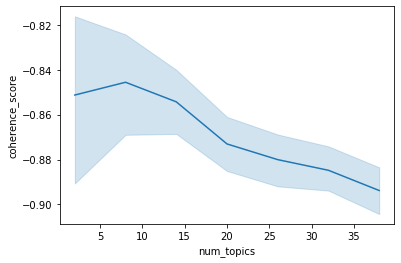

In [125]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [76]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2785
Num Topics = 8  has Coherence Value of 0.3029
Num Topics = 14  has Coherence Value of 0.2887
Num Topics = 20  has Coherence Value of 0.2852
Num Topics = 26  has Coherence Value of 0.2846
Num Topics = 32  has Coherence Value of 0.2914
Num Topics = 38  has Coherence Value of 0.2878


In [89]:
lda[id2word.doc2bow(tokenize("This is a sample document to score with a topic distribution."))]

[(0, 0.02226036),
 (1, 0.022260414),
 (2, 0.022260347),
 (3, 0.022260347),
 (4, 0.022260392),
 (5, 0.0222604),
 (6, 0.022260347),
 (7, 0.35487327),
 (8, 0.022260398),
 (9, 0.022260517),
 (10, 0.022260416),
 (11, 0.022260422),
 (12, 0.3557417),
 (13, 0.022260347),
 (14, 0.022260347)]

## Challenge
### *Can we see if one of the authors focus more on men than women?*

*  Use Spacy for text prepocessing
*  Extract the Named Entities from the documents using Spacy (command is fairly straight forward)
*  Create unique list of names from the authors (you'll find that there are different types of named entities not all people)
*  Label the names with genders (can you this by hand or you use the US census name lists)
*  Customize your processing to replace the proper name with your gender from the previous step's lookup table
*  Then follow the rest of the LDA flow

In [78]:
import spacy

nlp = spacy.load('en_core_web_lg')

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/neural/train.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from .optimizers import Adam, linear_decay
/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/check.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, Sized, Iterable, Callable
/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/check.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, Sized, Iterable, Callable


In [79]:
test = "Ned asked me a question about England today."

In [80]:
doc = nlp(test)

for token in doc:
    print(token.text, token.lemma_, token.pos_)

Ned Ned PROPN
asked ask VERB
me -PRON- PRON
a a DET
question question NOUN
about about ADP
England England PROPN
today today NOUN
. . PUNCT


In [81]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Ned PERSON
England GPE
today DATE


In [82]:
def doc_stream(path):
    for f in os.listdir(path):
        with open(os.path.join(path,f)) as t:
            text = t.read().strip('\n')
            yield text

def get_people(docstream):
    
    ppl = []
    
    for d in docstream:
        
        doc = nlp(d)
        
        for ent in doc.ents:
            
            if ent.label_ == "PERSON":
                ppl.append(ent.lemma_)
                
    return set(ppl)

In [129]:
people = get_people(doc_stream(path))

In [126]:
doc = nlp(next(doc_stream(path)))

In [128]:
doc.ents[0].lemma_

'yesterday'

# Sources

### *References*
* [Andrew Ng et al paper on LDA](https://ai.stanford.edu/~ang/papers/jair03-lda.pdf)
* On [Coherence](https://pdfs.semanticscholar.org/1521/8d9c029cbb903ae7c729b2c644c24994c201.pdf)

### *Resources*

* [Gensim](https://radimrehurek.com/gensim/): Python package for topic modeling, nlp, word vectorization, and few other things. Well maintained and well documented.
* [Topic Modeling with Gensim](http://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#11createthedictionaryandcorpusneededfortopicmodeling): A kind of cookbook for LDA with gensim. Excellent overview, but the you need to be aware of missing import statements and assumed prior knowledge.
* [Chinese Restuarant Process](https://en.wikipedia.org/wiki/Chinese_restaurant_process): That really obscure stats thing I mentioned... 
* [PyLDAvis](https://github.com/bmabey/pyLDAvis): Library for visualizing the topic model and performing some exploratory work. Works well. Has a direct parrell implementation in R as well. 
* [Rare Technologies](https://rare-technologies.com/): The people that made & maintain gensim and a few other libraries.
* [Jane Austen v. Charlotte Bronte](https://www.literaryladiesguide.com/literary-musings/jane-austen-charlotte-bronte-different-alike/)